In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow.compat.v1 as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import plot_model

In [2]:
up_data=[]
down_data=[]

In [3]:
type(up_data),type(down_data)

(list, list)

In [4]:
up_path = "train/up"
down_path = "train/down"

for file in os.listdir(up_path):
    if file.endswith(".csv"):
        data = pd.read_csv(os.path.join(up_path, file)).values
        up_data.append(data)

for file in os.listdir(down_path):
    if file.endswith(".csv"):
        data = pd.read_csv(os.path.join(down_path, file)).values
        down_data.append(data)

In [5]:
up_data

[array([[296],
        [432],
        [256],
        [237],
        [200],
        [160],
        [170],
        [163],
        [ 22],
        [256],
        [260],
        [ 86],
        [ 36],
        [ 81],
        [ 45],
        [176],
        [101],
        [ 16],
        [ 18],
        [113],
        [  6],
        [ 18],
        [ 21],
        [ 53],
        [ 79],
        [267],
        [318],
        [528],
        [481],
        [635],
        [657],
        [714],
        [696],
        [686],
        [736],
        [711],
        [689],
        [588],
        [507],
        [490],
        [358],
        [157],
        [ 17],
        [259],
        [341],
        [784],
        [454],
        [384],
        [506],
        [122],
        [387],
        [379],
        [110],
        [  0],
        [ 64],
        [  0],
        [ 60],
        [147],
        [166],
        [370],
        [170],
        [  0],
        [164],
        [ 68],
        [105],
        [194],
        [1

In [6]:
len(up_data)


50

In [7]:
down_data,len(down_data)

([array([[ 103],
         [  50],
         [  15],
         [  41],
         [  48],
         [  40],
         [ 699],
         [  31],
         [ 342],
         [ 192],
         [ 307],
         [ 615],
         [ 977],
         [1240],
         [1205],
         [1654],
         [1034],
         [1104],
         [ 999],
         [ 832],
         [ 784],
         [ 675],
         [ 515],
         [ 286],
         [  13],
         [ 399],
         [ 581],
         [ 867],
         [1267],
         [1234],
         [ 976],
         [1191],
         [ 882],
         [ 738],
         [ 432],
         [ 458],
         [ 427],
         [ 246],
         [ 380],
         [  25],
         [  60],
         [  38],
         [  43],
         [  43],
         [ 206],
         [  55],
         [ 105],
         [  50],
         [  39],
         [  11],
         [ 144],
         [  16],
         [  80],
         [ 285],
         [ 702],
         [ 594],
         [ 861],
         [ 691],
         [ 730

In [8]:
len(up_data[2]),len(down_data[2])



(75, 75)

In [9]:
type(up_data[2]),type(down_data[2])



(numpy.ndarray, numpy.ndarray)

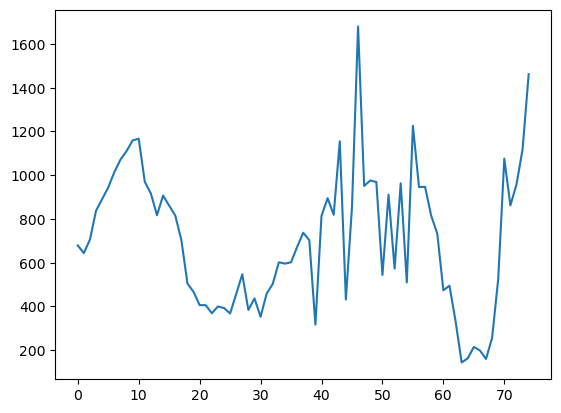

In [10]:
plt.plot(up_data[1])
plt.show()

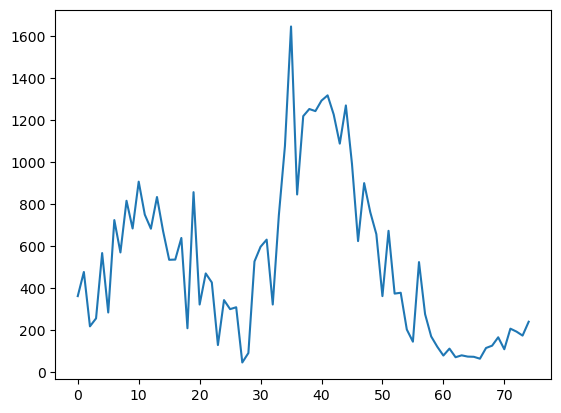

In [11]:
plt.plot(down_data[1])
plt.show()

In [12]:
up_data_np=np.array(up_data)
down_data_np=np.array(down_data)

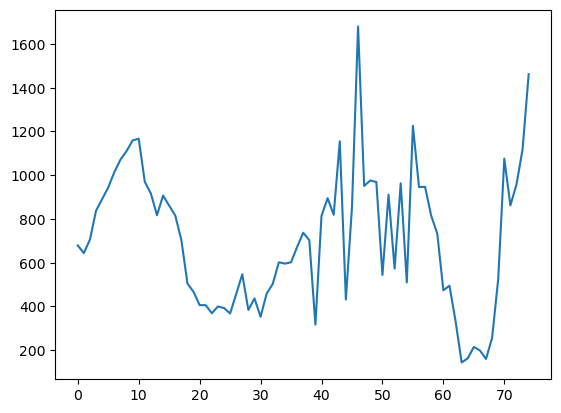

In [13]:
plt.plot(up_data_np[1])
plt.show()

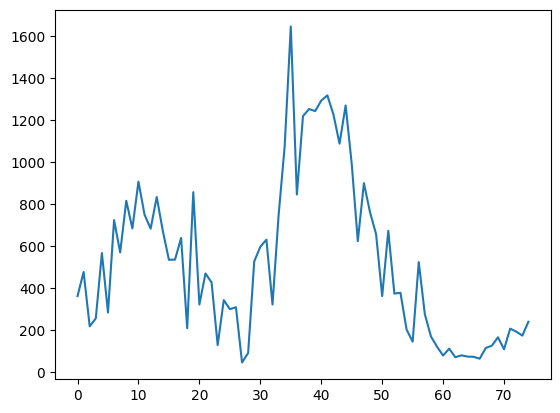

In [30]:
plt.plot(down_data_np[1])
plt.show()

In [31]:
up_data_np[1]

array([[ 679],
       [ 644],
       [ 706],
       [ 838],
       [ 891],
       [ 944],
       [1014],
       [1071],
       [1110],
       [1159],
       [1167],
       [ 970],
       [ 916],
       [ 817],
       [ 907],
       [ 861],
       [ 816],
       [ 704],
       [ 505],
       [ 467],
       [ 406],
       [ 406],
       [ 369],
       [ 400],
       [ 393],
       [ 368],
       [ 457],
       [ 547],
       [ 384],
       [ 437],
       [ 353],
       [ 459],
       [ 503],
       [ 602],
       [ 596],
       [ 602],
       [ 672],
       [ 737],
       [ 703],
       [ 317],
       [ 814],
       [ 895],
       [ 819],
       [1155],
       [ 432],
       [ 853],
       [1680],
       [ 951],
       [ 976],
       [ 969],
       [ 544],
       [ 911],
       [ 573],
       [ 963],
       [ 510],
       [1226],
       [ 946],
       [ 947],
       [ 815],
       [ 733],
       [ 474],
       [ 495],
       [ 333],
       [ 144],
       [ 163],
       [ 215],
       [ 1

In [14]:
up_data_np.shape,down_data_np.shape

((50, 75, 1), (50, 75, 1))

In [15]:
up_data_np_re=up_data_np.reshape(-1,75,1)
down_data_np_re=down_data_np.reshape(-1,75,1)

In [16]:
up_data_np_re

array([[[ 296],
        [ 432],
        [ 256],
        ...,
        [ 129],
        [ 231],
        [ 142]],

       [[ 679],
        [ 644],
        [ 706],
        ...,
        [ 958],
        [1119],
        [1462]],

       [[1296],
        [1095],
        [ 855],
        ...,
        [3440],
        [3274],
        [3456]],

       ...,

       [[ 464],
        [ 479],
        [ 535],
        ...,
        [ 503],
        [ 567],
        [ 653]],

       [[ 151],
        [ 333],
        [ 496],
        ...,
        [ 267],
        [ 178],
        [ 289]],

       [[3253],
        [3043],
        [2213],
        ...,
        [4095],
        [4095],
        [4095]]], dtype=int64)

In [17]:
down_data_np_re

array([[[ 103],
        [  50],
        [  15],
        ...,
        [ 556],
        [ 469],
        [ 575]],

       [[ 362],
        [ 477],
        [ 218],
        ...,
        [ 193],
        [ 174],
        [ 240]],

       [[3792],
        [3801],
        [3471],
        ...,
        [ 744],
        [ 701],
        [ 814]],

       ...,

       [[ 235],
        [ 448],
        [ 362],
        ...,
        [  16],
        [  28],
        [   0]],

       [[1105],
        [1502],
        [1872],
        ...,
        [ 891],
        [ 816],
        [ 813]],

       [[2367],
        [2205],
        [1841],
        ...,
        [3493],
        [3526],
        [3916]]], dtype=int64)

In [18]:
up_labels=np.ones(up_data_np_re.shape[0])
down_labels=np.zeros(down_data_np_re.shape[0])

In [19]:
up_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [20]:
len(up_labels)


50

In [22]:
down_labels,len(down_labels)


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 50)

In [23]:
up_labels.shape,type(up_labels)

((50,), numpy.ndarray)

In [24]:
down_labels.shape,type(down_labels)

((50,), numpy.ndarray)

In [25]:
x=np.concatenate([up_data_np_re,down_data_np_re],axis=0)

In [26]:
x.shape,type(x)

((100, 75, 1), numpy.ndarray)

In [27]:
y=np.concatenate([up_labels,down_labels],axis=0)

In [28]:
y.shape,type(y)

((100,), numpy.ndarray)

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [30]:
type(x_train),x_train.shape

(numpy.ndarray, (80, 75, 1))

In [31]:
x_train_re=x_train.reshape(x_train.shape[0],75,1,1)*0.1

In [32]:
x_test_re=x_test.reshape(x_test.shape[0],75,1,1)*0.1

In [33]:
x_train_re.shape , x_test_re.shape

((80, 75, 1, 1), (20, 75, 1, 1))

In [34]:
x_train_re[0]

array([[[ 55.8]],

       [[130.3]],

       [[ 96.2]],

       [[ 81.6]],

       [[ 85.6]],

       [[100.8]],

       [[121.6]],

       [[ 92.5]],

       [[168.2]],

       [[117.3]],

       [[107. ]],

       [[145.9]],

       [[146.4]],

       [[ 98. ]],

       [[172.6]],

       [[155.6]],

       [[ 94.6]],

       [[158.8]],

       [[167.4]],

       [[171.5]],

       [[180.8]],

       [[207.5]],

       [[206.1]],

       [[233.4]],

       [[174.1]],

       [[409.5]],

       [[248.3]],

       [[320.1]],

       [[316.1]],

       [[251.3]],

       [[237.3]],

       [[258.1]],

       [[287.2]],

       [[276.8]],

       [[307.8]],

       [[269. ]],

       [[226.1]],

       [[223.5]],

       [[201.3]],

       [[204.5]],

       [[147.9]],

       [[145.6]],

       [[143.8]],

       [[ 80.2]],

       [[ 44.3]],

       [[ 21.3]],

       [[  6.5]],

       [[ 24.1]],

       [[ 65.3]],

       [[ 84.8]],

       [[119.5]],

       [[117.7]],

       [[140

In [35]:
x_train_re[0].shape,len(x_train_re[0].shape)

((75, 1, 1), 3)

In [36]:
model=Sequential()
model.add(Conv2D(16,(1,1),activation='relu',input_shape=x_train_re[0].shape))
model.add(Dropout(0.1))
model.add(Conv2D(32,(1,1),activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 1, 16)         32        
                                                                 
 dropout (Dropout)           (None, 75, 1, 16)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 1, 32)         544       
                                                                 
 dropout_1 (Dropout)         (None, 75, 1, 32)         0         
                                                                 
 flatten (Flatten)           (None, 2400)              0         
                                                                 
 dense (Dense)               (None, 64)                153664    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.FalseNegatives(),tf.keras.metrics.FalsePositives(),'accuracy'])

In [39]:
history=model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2,verbose=1)

Epoch 1/20
2/2 [==============================] - 0s 62ms/step - loss: 3.7995 - false_negatives: 17.0000 - false_positives: 13.0000 - accuracy: 0.5312 - val_loss: 0.5555 - val_false_negatives: 4.0000 - val_false_positives: 0.0000e+00 - val_accuracy: 0.7500
Epoch 2/20
2/2 [==============================] - 0s 37ms/step - loss: 1.4842 - false_negatives: 19.0000 - false_positives: 6.0000 - accuracy: 0.6094 - val_loss: 0.6002 - val_false_negatives: 4.0000 - val_false_positives: 1.0000 - val_accuracy: 0.6875
Epoch 3/20
2/2 [==============================] - 0s 37ms/step - loss: 1.2158 - false_negatives: 19.0000 - false_positives: 9.0000 - accuracy: 0.5625 - val_loss: 0.6160 - val_false_negatives: 0.0000e+00 - val_false_positives: 9.0000 - val_accuracy: 0.4375
Epoch 4/20
2/2 [==============================] - 0s 35ms/step - loss: 1.2228 - false_negatives: 7.0000 - false_positives: 22.0000 - accuracy: 0.5469 - val_loss: 0.6291 - val_false_negatives: 0.0000e+00 - val_false_positives: 9.0000 - 

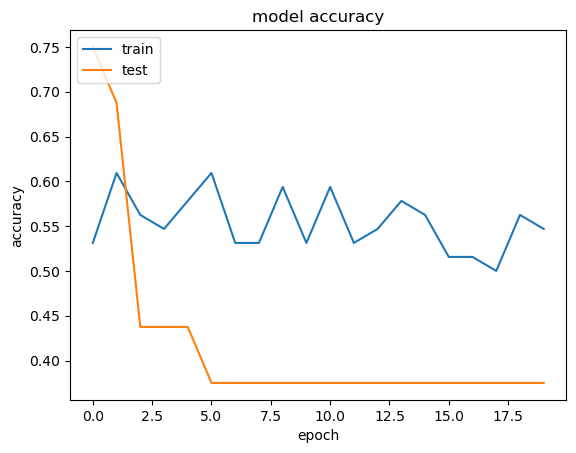

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

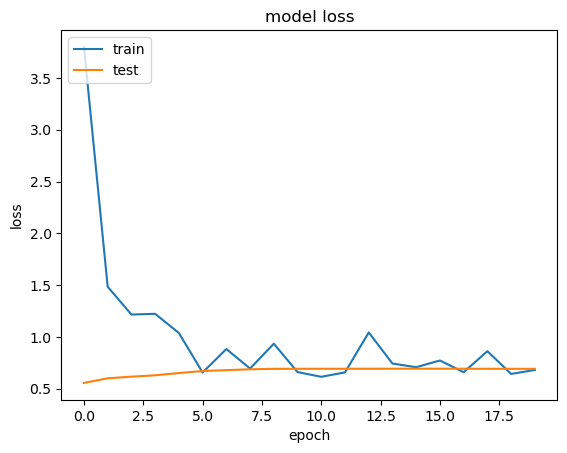

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
accuracy = model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 25ms/step - loss: 0.6928 - false_negatives: 0.0000e+00 - false_positives: 8.0000 - accuracy: 0.6000


In [53]:
df4=pd.read_csv("train/down/down_40.csv")

In [54]:
df4

,x
0,677
1,458
2,206
3,201
4,0
...,...
70,363
71,144
72,90
73,161


In [55]:
df6=df4.values*0.1

In [56]:
df6

array([[6.770e+01],
       [4.580e+01],
       [2.060e+01],
       [2.010e+01],
       [0.000e+00],
       [9.400e+00],
       [3.360e+01],
       [1.580e+01],
       [0.000e+00],
       [2.720e+01],
       [6.000e+01],
       [1.104e+02],
       [2.435e+02],
       [2.000e+02],
       [9.300e+01],
       [1.090e+01],
       [4.120e+01],
       [9.590e+01],
       [9.350e+01],
       [1.360e+02],
       [8.620e+01],
       [1.531e+02],
       [9.390e+01],
       [6.200e+01],
       [4.100e+00],
       [4.960e+01],
       [1.108e+02],
       [0.000e+00],
       [1.100e+00],
       [1.600e+00],
       [2.680e+01],
       [1.140e+01],
       [5.110e+01],
       [7.190e+01],
       [1.584e+02],
       [1.525e+02],
       [1.590e+02],
       [1.328e+02],
       [6.640e+01],
       [4.420e+01],
       [2.540e+01],
       [8.190e+01],
       [1.211e+02],
       [1.253e+02],
       [6.790e+01],
       [1.146e+02],
       [4.130e+01],
       [4.470e+01],
       [1.950e+01],
       [1.600e+00],


In [57]:
df6_re=df6.reshape(-1,75,1)

In [58]:
y_pred6=model.predict(df6_re)

1/1 [==============================] - 0s 20ms/step


In [59]:
y_pred6[0][0]

0.500971